In [1]:
from pylab import *
%matplotlib inline

### Oscilador en coordenadas polares.

De las ec. de Euler-Lagrange:

$$
\frac{d}{dt} \left( \frac{ \partial L}{ \partial \dot{q_i}} \right) - \frac{ \partial L}{\partial q_i}=f_{fric}
$$

$$
\vec{F}=-k \vec{r} \implies V= \frac{k}{2}r^2 \implies L=\frac{m}{2}(\dot{r}^2+(r \dot{\theta})^2) - \frac{k}{2}r^2
$$

Con $q_1=r,q_2= \theta$ 

$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{r}}\right)=m\ddot{r} \hspace{2cm} \frac{\partial L}{\partial r}=m r\dot{\theta}^2-kr
$$

$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}}\right)=m(r\ddot{\theta}+\dot{r}\dot{\theta}) \hspace{2cm} \frac{\partial L}{\partial \theta}=0
$$

La ecuaciones de movimiento quedan como:

$$
m\ddot{r} -r(m\dot{\theta}^2-k)=f_{fric}\dot{}\hat{r} \hspace{2cm} m(r\ddot{\theta}+\dot{r}\dot{\theta})=f_{fric}\dot{}\hat{\theta}
$$

### Coordenadas cartesianas

$$
\vec{F}=-k \vec{r} \implies V= \frac{k}{2}r^2=\frac{k}{2}x^2+y^2 \implies L=\frac{m}{2}(\dot{x}^2+\dot{y}^2) - \frac{k}{2}(x^2+y^2)
$$

Con $q_1=x,q_2=y$ 

$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{x}}\right)=m\ddot{x} \hspace{2cm} \frac{\partial L}{\partial x}=-kx
$$

$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{y}}\right)=m\ddot{y} \hspace{2cm} \frac{\partial L}{\partial y}=-ky
$$

La ecuaciones de movimiento quedan como:

$$
m\ddot{x} +kx=f_{fric}\dot{}\hat{x} \hspace{2cm} m\ddot{y}+ky=f_{fric}\dot{}\hat{y}
$$

In [2]:
def RK4(ec,p_ini,x,args=[],h=0.01): #integrador Runge-Kutta de  4 orden el cual integra ecuaciones diferenciales
    if (x[1]-x[0]) < 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [3]:
def osc_2D(r_v,t,args=0,m=1,k=1):
    dx=r_v[2]
    dy=r_v[3]
    v=sqrt(dx**2+dy**2)
    gamma,mu = args[0],args[1]
    if v<=1:
        dv_x=-k*r_v[0]-gamma*r_v[2]/m
        dv_y=-k*r_v[1]-gamma*r_v[3]/m
    else:
        dv_x=-k*r_v[0]-mu*sqrt(v)*r_v[2]/m
        dv_y=-k*r_v[1]-mu*sqrt(v)*r_v[3]/m  
    return array([dx,dy,dv_x,dv_y])
    

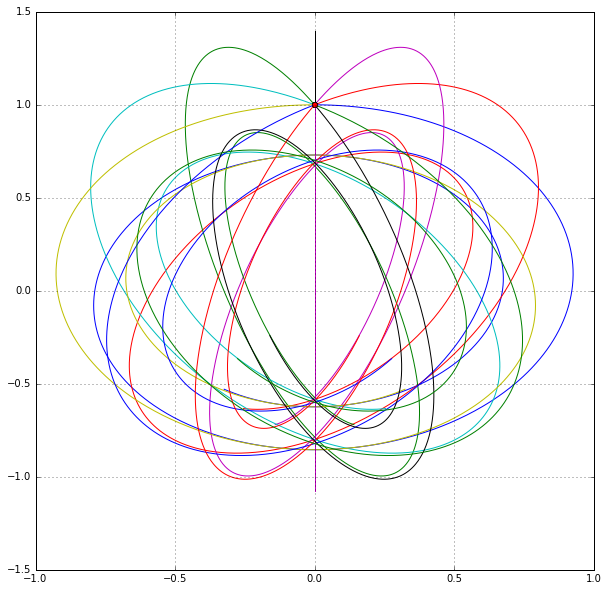

In [4]:
figure(figsize=(10,10))
for n in xrange(12):
    t,sol=RK4(osc_2D,[0,1,cos(n*pi/6),sin(n*pi/6)],[0,10],[0.1,0.2])
    plot(sol[:,0],sol[:,1])
    plot(sol[0,0],sol[0,1],'o',markersize=5)
grid(True)

In [5]:
def Energia(n,dt=.1,m=1,k=1,):
    cond_inicial=array([0,1,cos(n*pi/6),sin(n*pi/6)])
    E_i= m*((cond_inicial[2]**2) + (cond_inicial[3]**2))/2 + k*((cond_inicial[0]**2) + (cond_inicial[1]**2))/2
    Energias=[E_i]
    tiempos=[0]
    i=0
    while Energias[-1]>0.01*E_i:
        t,sol=RK4(osc_2D,cond_inicial,[0,dt],[0.1,0.2])
        cond_inicial=sol[-1,:]
        E=m*(cond_inicial[2]**2+cond_inicial[3]**2)/2 + k*(cond_inicial[0]**2 + cond_inicial[1]**2)/2
        i += 1
        tiempos.append(dt*i)
        Energias.append(E)
    return tiempos,Energias

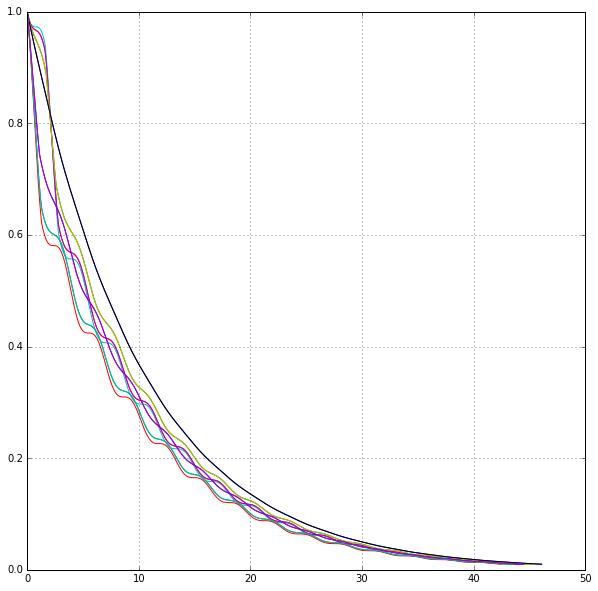

In [6]:
figure(figsize=(10,10),dpi=100)
for n in xrange(12):
    t,E=Energia(n)
    plot(t,E)
grid(True)
show()

In [7]:
def Mom_ang(n):
    t,sol=RK4(osc_2D,array([0,1,cos(n*pi/6),sin(n*pi/6)]),[0,50],[0.1,0.2])
    L=sol[:,0]*sol[:,3]-sol[:,1]*sol[:,2]
    return t,L

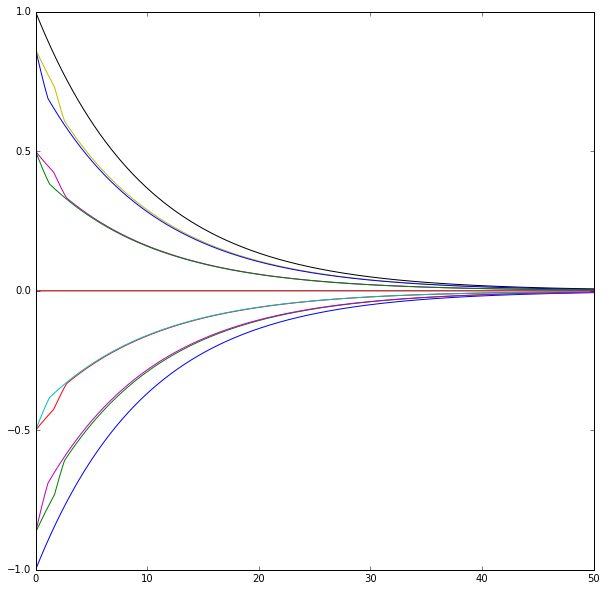

In [8]:
figure(figsize=(10,10))
for n in xrange(12):
    t,L=Mom_ang(n)
    plot(t,L)

Las condiciones iniciales (x,y,v_x,v_y)= [ 0.7764491   0.05703085  0.31284702  0.4968207 ]
Las condiciones iniciales (r,theta,v_r,v_theta)= [ 0.77854076  0.07331919  0.34840038  0.61357799]


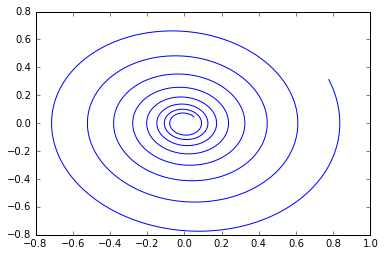

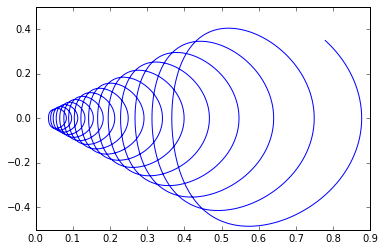

In [9]:
cond_ini=random(4)
x0,y0,vx0,vy0=cond_ini[0],cond_ini[1],cond_ini[2],cond_ini[3]
cond_ini_pol=array([sqrt(x0**2+y0**2),arctan(y0/x0),(x0*vx0+y0*vy0)/(sqrt(x0**2+y0**2)),(x0*vy0-y0*vx0)/(x0**2-y0**2)])
print "Las condiciones iniciales (x,y,v_x,v_y)=",cond_ini
print "Las condiciones iniciales (r,theta,v_r,v_theta)=",cond_ini_pol
t,sol=RK4(osc_2D,cond_ini,[0,50],[0.1,0.2])
plot(sol[:,0],sol[:,2])
show()
r=sqrt(sol[:,0]**2+sol[:,1]**2)
p_r=(sol[:,0]*sol[:,2]+sol[:,1]*sol[:,3])/r
plot(r,p_r)
show()

Ahora bien si le ponemos una fuerza de tipo coulumbiana tenemos lo siguiente:

$$
\vec{F}(\vec{r}) = -k_1\vec{r}+k_q \frac{q^2}{r^2} \implies V(r)=\frac{k_1}{2}r^2+k_q \frac{q^2}{r}
$$

Por lo que la única diferencia de las ecuaciones que se vieron anteriormente es 

$$
\frac{\partial L}{\partial r}= m r \dot{\theta}^2 -kr + k_q\frac{q^2}{r^2}
$$

Por lo tanto las ecuaciones diferenciales en polares quedan como:

$$
m\ddot{r} -r(m\dot{\theta}^2-k)-k_q\frac{q^2}{r^2}=f_{fric}\dot{}\hat{r} \hspace{2cm} m(r\ddot{\theta}+\dot{r}\dot{\theta})=f_{fric}\dot{}\hat{\theta}
$$

En coordenadas cartesianas tenemos.

$$
\vec{F(\vec{r}} = -k_1\vec{r}+k_q \frac{q^2}{r^2} \implies V(x,y)=\frac{k_1}{2}(x^2+y^2)+k_q \frac{q^2}{\sqrt{(x^2+y^2)}}
$$

y sus ecuaciones se modifican en:

$$
\frac{\partial L}{\partial x}=-kx + k_q q^2\frac{x}{(x^2+y^2)^{\frac{3}{2}}} \hspace{2cm} \frac{\partial L}{\partial y}=-ky + k_q q^2\frac{y}{(x^2+y^2)^{\frac{3}{2}}}
$$

Por lo tanto las ecuaciones de movimeiento en cartesianas quedan:

$$
m\ddot{x} +kx-k_q q^2\frac{x}{(x^2+y^2)^{\frac{3}{2}}}=f_{fric}\dot{}\hat{x} \hspace{2cm} m\ddot{y}+ky-k_q q^2\frac{y}{(x^2+y^2)^{\frac{3}{2}}}=f_{fric}\dot{}\hat{y}
$$

In [10]:
def osc_2D_carga(r_v,t,args=[0,0],m=1,q=1,k=1,k_q=1):
    dx=r_v[2]
    dy=r_v[3]
    v=sqrt(r_v[2]**2+r_v[3]**2)
    r32=(r_v[0]**2+r_v[1]**2)**(1.5)
    gamma, mu = args[0], args[1]
    if sqrt(dx**2+dy**2)<1:
        dv_x=-k*r_v[0]-gamma*r_v[2]/m + k_q*q*q*r_v[0]/(r32)
        dv_y=-k*r_v[1]-gamma*r_v[3]/m + k_q*q*q*r_v[1]/(r32)
    else:
        dv_x=-k*r_v[0]-mu*sqrt(v)*r_v[2]/m + k_q*q*2*r_v[0]/(r32)
        dv_y=-k*r_v[1]-mu*sqrt(v)*r_v[3]/m + k_q*q*2*r_v[1]/(r32)
    return array([dx,dy,dv_x,dv_y])

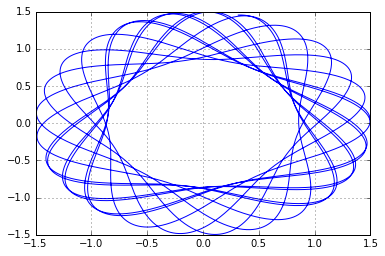

In [11]:
t,sol=RK4(osc_2D_carga,[1.5,0,0,0.5],[0,120],[0,0])
plot(sol[:,0],sol[:,1])
grid(True)
show()
#t,sol=RK4(osc_2D_carga,[1,0,0,.1],[0,100],[0.1,0])
#plot(sol[:,0],sol[:,1])

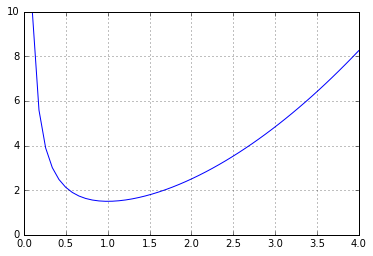

In [12]:
r=linspace(0.1,4)
V=0.5*r*r+(1/r)
plot(r,V)
ylim([0,10])
grid(True)
show()

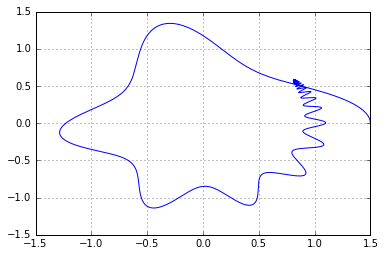

In [13]:
t,sol=RK4(osc_2D_carga,[1.5,0,0,0.5],[0,120],[0.1,0.2])
plot(sol[:,0],sol[:,1])
grid(True)
show()

In [14]:
def e_mov(r_v,t,gamma=[0],g=9.8,m=1): #ecuaciones de movimiento
    dx = r_v[2] #derivada de x
    dy = r_v[3] #derivada de y
    dvx = 0-gamma[0]*r_v[2] #derivada de vx utilizo segunda ley de newton
    dvy = -g-gamma[0]*r_v[3] #derivada de vy, utilizando segunda ley de Newton
    return array([dx,dy,dvx,dvy]) #me regresa array de las derivadas

def pared_arriba(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    y_izq=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    ymed = sol[-1,:]
    while abs(y_izq[1]-3-5*tan(alfa)) > 1e-8:
        #print y_izq[1]
        if (y_izq[1]-3-5*tan(alfa))*(ymed[1]-3-5*tan(alfa)) < 0:
            reinicio = y_izq
        else:
            reinicio = ymed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        y_izq = reinicio
        ymed = sol[-1,:] #es el ultimo punto que integro
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

def pared_abajo_1(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    pmed = sol[-1,:]
    while abs(p_ant[1]-(5-p_ant[0])*tan(alfa)) > 1e-8:
        #print p_ant[0],p_ant[1]
        if (p_ant[1]-(5-p_ant[0])*tan(alfa))*(pmed[1]-(5-pmed[0])*tan(alfa)) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],p_ant[2],-p_ant[3]])
    return p_ant
            
def pared_abajo_2(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    pmed = sol[-1,:]
    while abs(p_ant[1]-(p_ant[0]-5)*tan(alfa)) > 1e-8:
        if (p_ant[1]-(p_ant[0]-5)*tan(alfa))*(pmed[1]-(pmed[0]-5)*tan(alfa)) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],p_ant[2],-p_ant[3]])
    return p_ant

def pared_izq(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    pmed = sol[-1,:]
    while abs(p_ant[0]) > 1e-8:
        if (p_ant[0]*pmed[0]) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],-p_ant[2],p_ant[3]])
    return p_ant

def pared_der(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    pmed = sol[-1,:]
    while abs(p_ant[0]-10) > 1e-8:
        if (p_ant[0]-10)*(pmed[0]-10) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],-p_ant[2],p_ant[3]])
    return p_ant



In [15]:

#trayectoria=zeros((5000,4)) #trayectoria es un array de zeros cuya primer entrada es la cond inicial
def caja(alfa,dt,n,gamma=[0],i=0):
    trayectoria = [array([5./3,10*tan(alfa)/3.,10*cos(n*alfa),10*sin(n*alfa)])]
    while i<= 100: #para cada paso
        t,sol_dt=RK4(e_mov,trayectoria[-1],[0,dt],gamma) #realiza una integracion con estos parametros
        if (sol_dt[-1,:][1]-(5-sol_dt[-1,:][0])*tan(alfa) < 0) and sol_dt[-1,:][0]<5 : #si hay un cambio de signo en la integracion 
            punto=pared_abajo_1(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        elif (sol_dt[-1,:][1]+(5-sol_dt[-1,:][0])*tan(alfa) < 0) and sol_dt[-1,:][0]>5:
            punto=pared_abajo_2(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        elif (sol_dt[-1,:][1]-3-5*tan(alfa))>0: #si no es asi
            punto=pared_arriba(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        elif sol_dt[-1,:][0]<0: #si no es asi
            punto=pared_izq(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        elif (sol_dt[-1,:][0]-10)>0: #si no es asi
            punto=pared_der(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        else: #si no es asi
            trayectoria.append(sol_dt[-1,:]) #la trayectoria es el ultimo punto de la integracion
    x_y=zeros((len(trayectoria),4))
    for j in range(len(trayectoria)):
        x_y[j]=trayectoria[j]
    return x_y


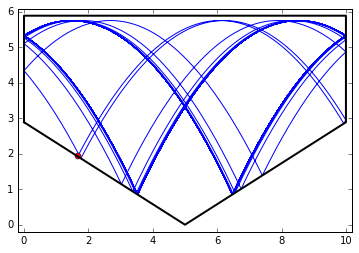

(-0.2, 6.0867513459481284)

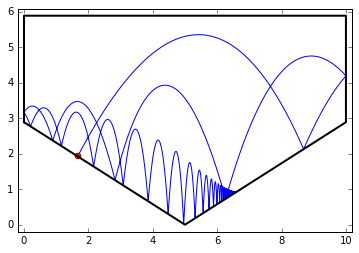

In [19]:
alfa=pi/6
x_y=caja(pi/6,0.01,2,[0])
plot(x_y[:,0],x_y[:,1])
plot(x_y[0,0],x_y[0,1],'ro')
plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
xlim([-.2,10.2])
ylim([-.2,5*tan(alfa)+3.2])
show()
alfa=pi/6
x_yf=caja(pi/6,0.01,2,[0.2])
plot(x_yf[:,0],x_yf[:,1])
plot(x_yf[0,0],x_yf[0,1],'ro')
plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
xlim([-.2,10.2])
ylim([-.2,5*tan(alfa)+3.2])

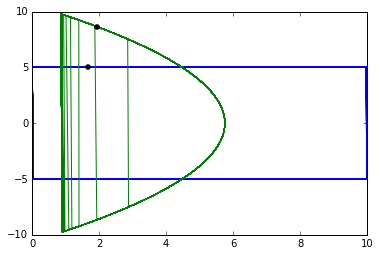

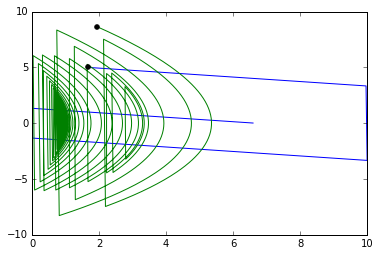

In [20]:
plot(x_y[:,0],x_y[:,2])
plot(x_y[:,1],x_y[:,3])
plot([x_y[0,0],x_y[0,1]],[x_y[0,2],x_y[0,3]],'ko',markersize=5)
show()
plot(x_yf[:,0],x_yf[:,2])
plot(x_yf[:,1],x_yf[:,3])
plot([x_yf[0,0],x_yf[0,1]],[x_yf[0,2],x_yf[0,3]],'ko',markersize=5)
show()